In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score, roc_curve, auc, make_scorer
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataframe=pd.read_excel("/content/drive/MyDrive/Freelance/Sri/task-1/Portfolio-Task-1-Short Data_Fresco.xlsx")
dataframe.head()

,CustomerID,Shopping Basket,Gender,Age,Store Type,Value Products,Brand Products,Top Fresco Products
0,20358063,48.81,Male,26,Convenient Stores,8,2,1
1,24635139,33.44,Female,33,Superstore,6,5,1
2,27584479,131.57,male,56,Online,35,8,12
3,28008212,20.02,Male,27,Convenient Stores,0,1,1
4,29130973,95.54,Female,55,Online,38,18,20


In [4]:
# storing the data in a separate variable
data = dataframe

In [5]:
data.shape

(75, 8)

In [6]:
data.describe()

,CustomerID,Shopping Basket,Age,Value Products,Brand Products,Top Fresco Products
count,7.500000e+01,75.000000,75.000000,75.000000,75.00000,75.000000
mean,5.528687e+07,60.960667,38.640000,15.813333,8.60000,6.893333
std,1.990541e+07,39.770647,13.808184,12.213963,6.17974,5.326054
min,2.035806e+07,3.400000,19.000000,0.000000,0.00000,0.000000
25%,3.654195e+07,25.595000,25.500000,7.000000,3.00000,3.000000
50%,5.230947e+07,58.060000,38.000000,13.000000,8.00000,6.000000
75%,7.258872e+07,85.160000,48.500000,20.000000,13.00000,10.000000
max,9.966645e+07,159.470000,68.000000,48.000000,23.00000,20.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           75 non-null     int64  
 1   Shopping Basket      75 non-null     float64
 2   Gender               75 non-null     object 
 3   Age                  75 non-null     int64  
 4   Store Type           75 non-null     object 
 5   Value Products       75 non-null     int64  
 6   Brand Products       75 non-null     int64  
 7   Top Fresco Products  75 non-null     int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 4.8+ KB


In [8]:
# defining the bins for the shopping basket values
bins = [0, 25, 70, float('inf')]

# define the labels for each bin
labels = ['Low spender', 'Medium spender', 'High spender']

# create a new column with the categorical values
data['spending_category'] = pd.cut(data['Shopping Basket'], bins=bins, labels=labels)


In [9]:
data = data.drop('Shopping Basket', axis = 1)

In [10]:
data.nunique()

CustomerID             75
Gender                  3
Age                    37
Store Type              3
Value Products         29
Brand Products         22
Top Fresco Products    18
spending_category       3
dtype: int64

In [11]:
# we can also drop the customer_id column as it is completely unique
data = data.drop('CustomerID', axis = 1)

In [12]:
data.head()

,Gender,Age,Store Type,Value Products,Brand Products,Top Fresco Products,spending_category
0,Male,26,Convenient Stores,8,2,1,Medium spender
1,Female,33,Superstore,6,5,1,Medium spender
2,male,56,Online,35,8,12,High spender
3,Male,27,Convenient Stores,0,1,1,Low spender
4,Female,55,Online,38,18,20,High spender


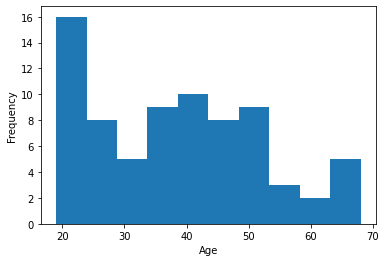

In [13]:
# plot a histogram of the Age column
plt.hist(data['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


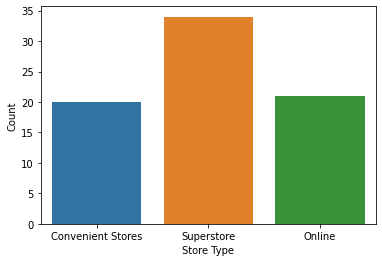

In [14]:

# create a bar plot of the Store Type column
sns.countplot(x='Store Type', data=data)
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()




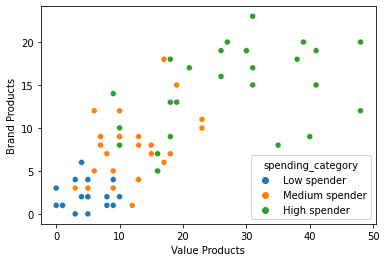

In [15]:
# create a scatter plot of the Value Products and Brand Products columns
sns.scatterplot(x='Value Products', y='Brand Products', hue='spending_category', data=data)
plt.xlabel('Value Products')
plt.ylabel('Brand Products')
plt.show()

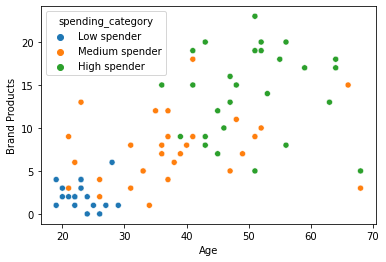

In [17]:
# create a scatter plot of the Value Products and Brand Products columns
sns.scatterplot(x='Age', y='Brand Products', hue='spending_category', data=data)
plt.xlabel('Age')
plt.ylabel('Brand Products')
plt.show()

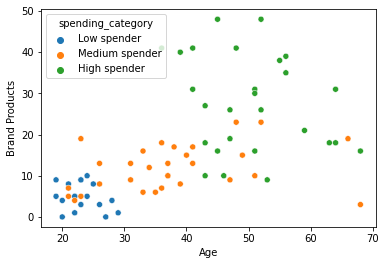

In [18]:
# create a scatter plot of the Value Products and Brand Products columns
sns.scatterplot(x='Age', y='Value Products', hue='spending_category', data=data)
plt.xlabel('Age')
plt.ylabel('Brand Products')
plt.show()

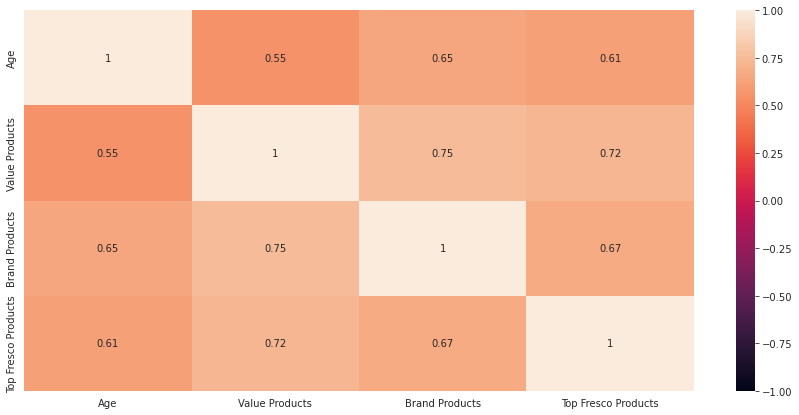

In [126]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

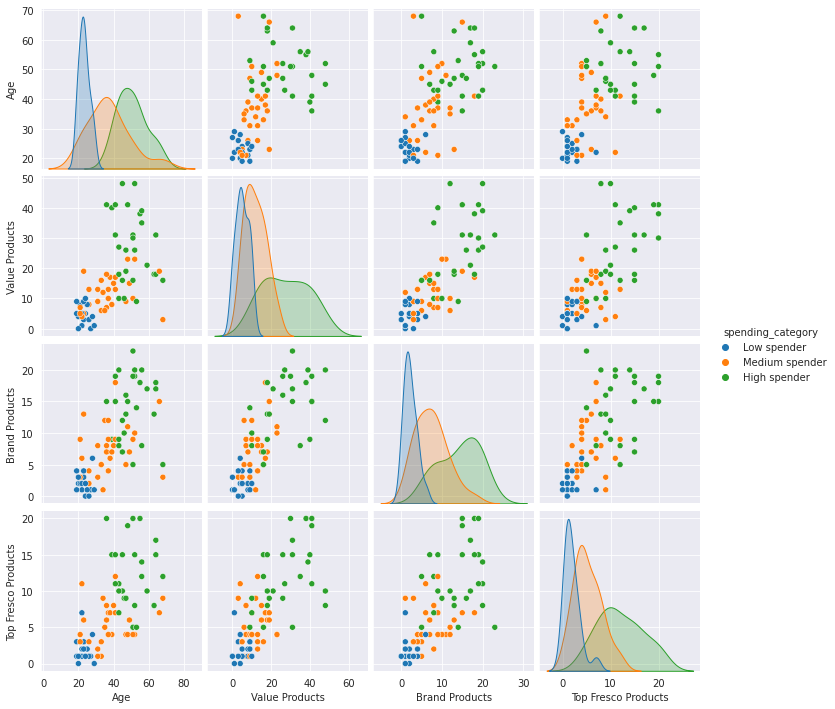

In [127]:
sns.pairplot(data, hue="spending_category")
plt.show()

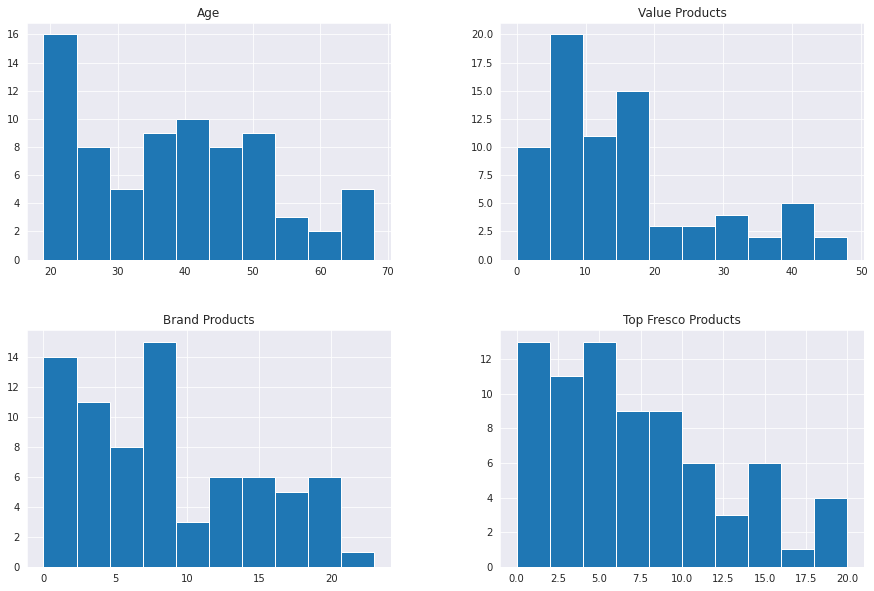

In [128]:
sns.set_style("darkgrid")
data.hist(figsize=(15, 10))
plt.show()

In [129]:
# define the dictionary values
spending_dict = {'Low spender': 1, 'Medium spender': 2, 'High spender': 3}

# map the spending_category column to dictionary values
data['spending_category'] = data['spending_category'].map(spending_dict)

In [130]:
# perform one-hot encoding on the Gender column
gender_onehot = pd.get_dummies(data['Gender'], prefix='Gender', drop_first=True)

# perform one-hot encoding on the Store Type column
storetype_onehot = pd.get_dummies(data['Store Type'], prefix='Store_Type', drop_first=True)

# concatenate the one-hot encoded columns with the original dataframe
data = pd.concat([data, gender_onehot, storetype_onehot], axis=1)

# drop the original categorical columns from the dataframe
data.drop(['Gender', 'Store Type'], axis=1, inplace=True)

In [131]:
# split the data into training and testing sets
X = data.drop('spending_category', axis=1)
y = data['spending_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<b> Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression
# build a logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Logistic Regression Score:', lr.score(X_test, y_test))


Logistic Regression Score: 0.6956521739130435


In [133]:

# make predictions on the test data
y_pred = lr.predict(X_test)

# evaluate the model using classification report and confusion matrix
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.67      0.40      0.50         5
           2       0.64      0.70      0.67        10
           3       0.78      0.88      0.82         8

    accuracy                           0.70        23
   macro avg       0.69      0.66      0.66        23
weighted avg       0.69      0.70      0.68        23



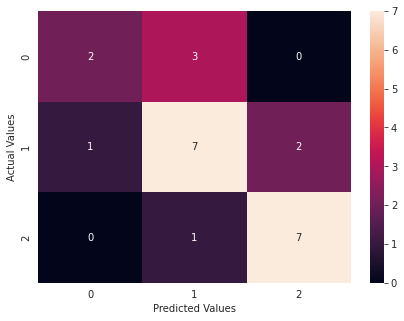

In [134]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [135]:
print("Accuracy on training set : ", accuracy_score(y_test, y_pred))


Accuracy on training set :  0.6956521739130435


In [136]:
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

Age                      12.058813
Value Products           10.066106
Brand Products           10.994764
Top Fresco Products       7.817195
Gender_Male               1.804993
Gender_male               1.354602
Store_Type_Online         4.463257
Store_Type_Superstore     4.264943
dtype: float64



<b> Decision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [138]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)
print('Decision Tree Score:', model0.score(X_test, y_test))


Decision Tree Score: 0.7391304347826086


In [146]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(3, 3)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [147]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (52, 8)
Shape of test set :  (23, 8)
Percentage of classes in training set:
2    0.384615
3    0.365385
1    0.250000
Name: spending_category, dtype: float64
Percentage of classes in test set:
2    0.434783
3    0.347826
1    0.217391
Name: spending_category, dtype: float64


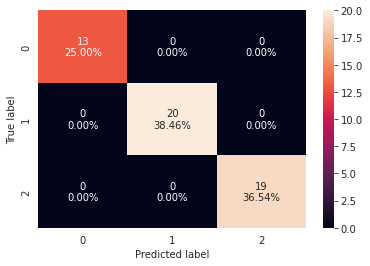

In [148]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [149]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


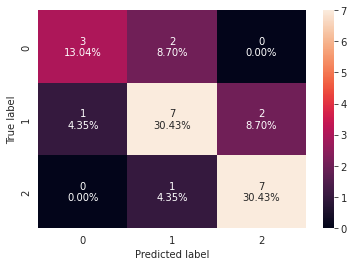

In [150]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [151]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.73913,0.73913,0.737923,0.73572


In [152]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

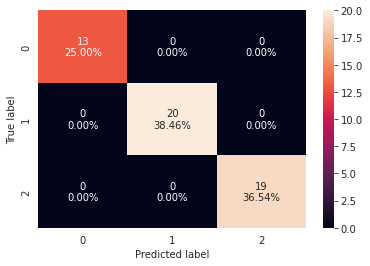

In [153]:
confusion_matrix_sklearn(model, X_train, y_train)

In [154]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


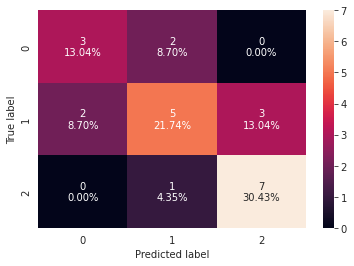

In [155]:
confusion_matrix_sklearn(model, X_test, y_test)

In [156]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.652174,0.652174,0.645652,0.642512


<b> Prepruned Decision Tree

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [159]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

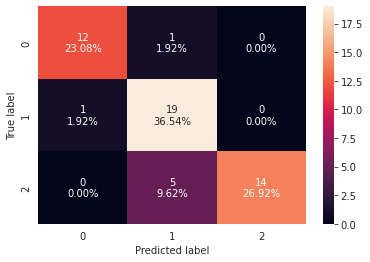

In [160]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [161]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.865385,0.865385,0.888462,0.865579


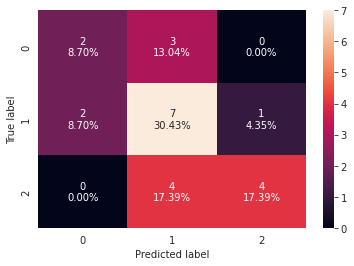

In [162]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [163]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.565217,0.565217,0.604348,0.564288


In [164]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

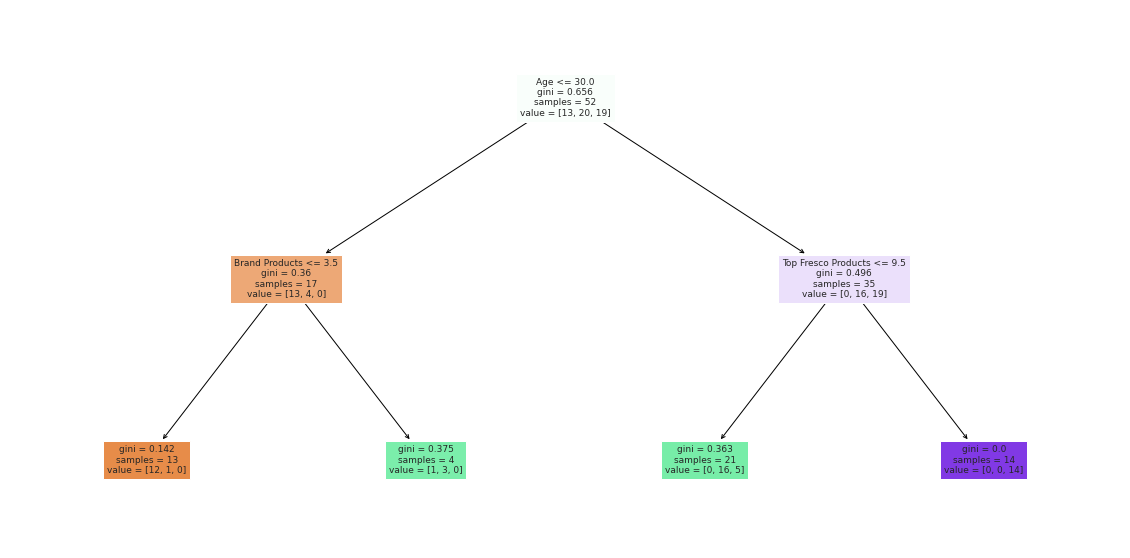

In [165]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [166]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Age <= 30.00
|   |--- Brand Products <= 3.50
|   |   |--- weights: [12.00, 1.00, 0.00] class: 1
|   |--- Brand Products >  3.50
|   |   |--- weights: [1.00, 3.00, 0.00] class: 2
|--- Age >  30.00
|   |--- Top Fresco Products <= 9.50
|   |   |--- weights: [0.00, 16.00, 5.00] class: 2
|   |--- Top Fresco Products >  9.50
|   |   |--- weights: [0.00, 0.00, 14.00] class: 3



In [167]:
importances = estimator.feature_importances_
importances

array([0.4590162 , 0.        , 0.11971798, 0.42126582, 0.        ,
       0.        , 0.        , 0.        ])

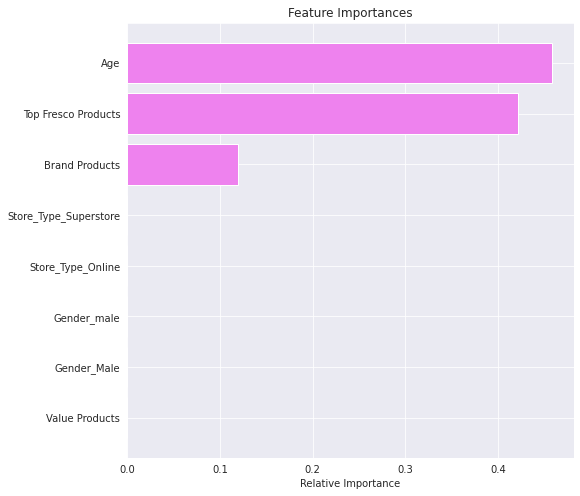

In [168]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

<b> Post pruned Decision Tree

In [169]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [170]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,3.344903e-17
1,1.752984e-17,5.097886e-17
2,3.330669e-17,8.428555e-17
3,8.540177e-17,1.696873e-16
4,7.635218e-16,9.332091e-16
5,1.058201e-02,3.174603e-02
6,2.051282e-02,9.328449e-02
7,2.531646e-02,1.186009e-01
8,2.886003e-02,1.474610e-01
9,4.515828e-02,1.926193e-01


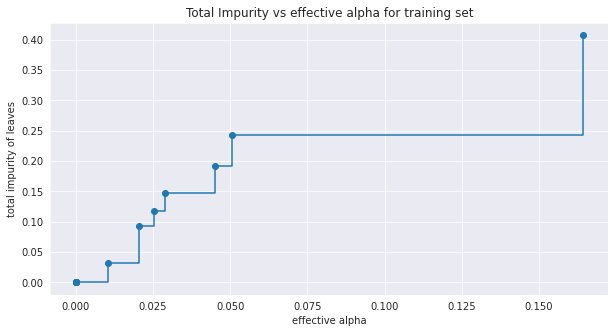

In [171]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [172]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2592592592592591


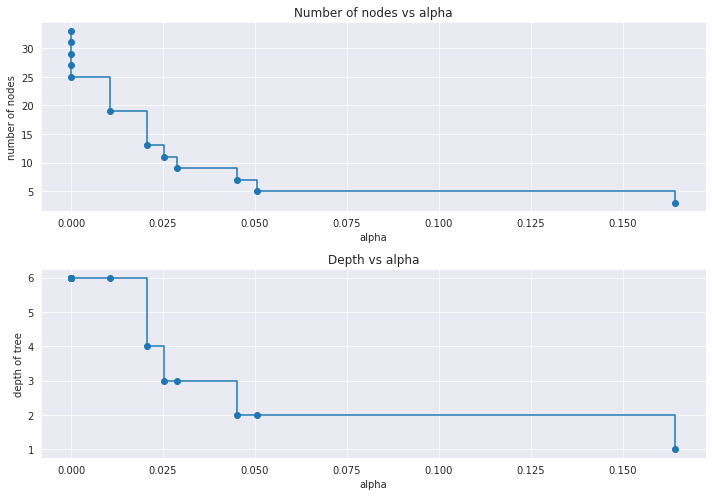

In [173]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [175]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train, average = 'weighted')
    recall_train.append(values_train)

In [176]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test,  average = 'weighted')
    recall_test.append(values_test)

In [177]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

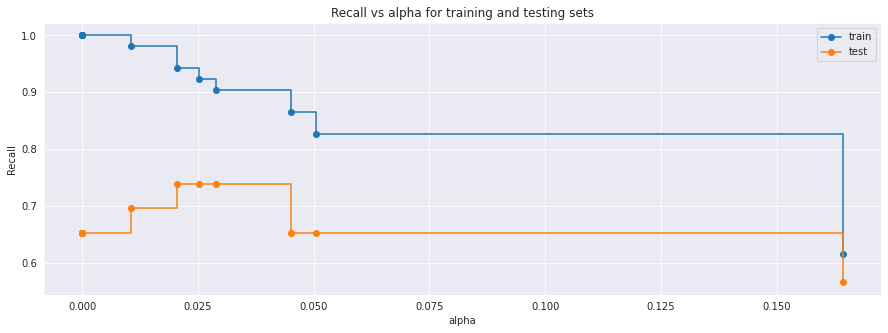

In [178]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [179]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.020512820512820457, class_weight='balanced',
                       random_state=1)


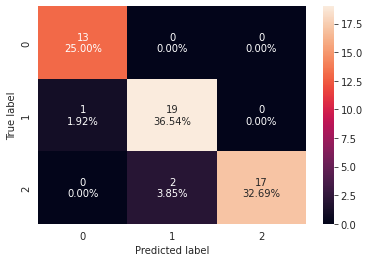

In [180]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [181]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.942308,0.942308,0.945513,0.942299


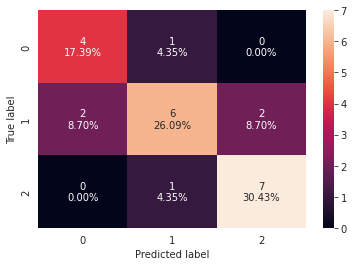

In [182]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [183]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.73913,0.73913,0.741546,0.734403


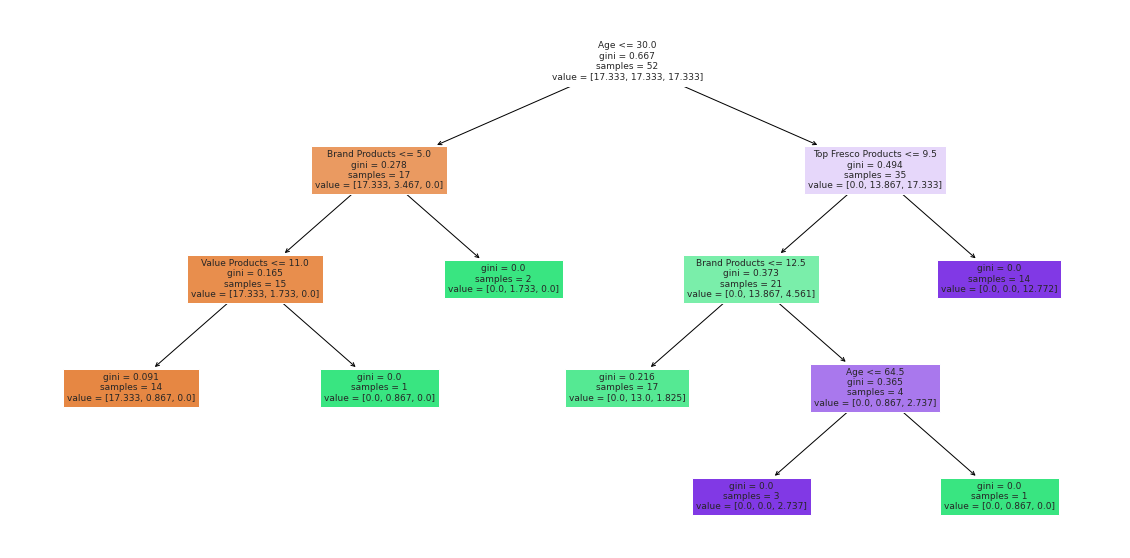

In [184]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [185]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))


|--- Age <= 30.00
|   |--- Brand Products <= 5.00
|   |   |--- Value Products <= 11.00
|   |   |   |--- weights: [17.33, 0.87, 0.00] class: 1
|   |   |--- Value Products >  11.00
|   |   |   |--- weights: [0.00, 0.87, 0.00] class: 2
|   |--- Brand Products >  5.00
|   |   |--- weights: [0.00, 1.73, 0.00] class: 2
|--- Age >  30.00
|   |--- Top Fresco Products <= 9.50
|   |   |--- Brand Products <= 12.50
|   |   |   |--- weights: [0.00, 13.00, 1.82] class: 2
|   |   |--- Brand Products >  12.50
|   |   |   |--- Age <= 64.50
|   |   |   |   |--- weights: [0.00, 0.00, 2.74] class: 3
|   |   |   |--- Age >  64.50
|   |   |   |   |--- weights: [0.00, 0.87, 0.00] class: 2
|   |--- Top Fresco Products >  9.50
|   |   |--- weights: [0.00, 0.00, 12.77] class: 3



In [186]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

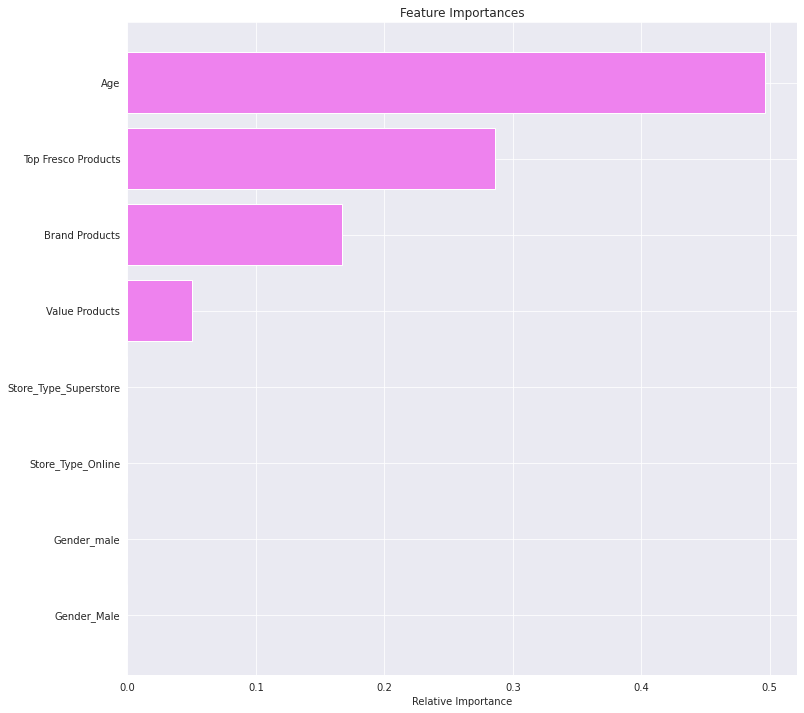

In [187]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [188]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.865385,0.942308
Recall,1.0,1.0,0.865385,0.942308
Precision,1.0,1.0,0.888462,0.945513
F1,1.0,1.0,0.865579,0.942299


In [189]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.739130,0.652174,0.565217,0.739130
Recall,0.739130,0.652174,0.565217,0.739130
Precision,0.737923,0.645652,0.604348,0.741546
F1,0.735720,0.642512,0.564288,0.734403


### Part -A

- Fresco market being one of the biggest business markets in UK wishes to identify trends and patterns in a sample of weekly data collected for a number of their loyalty cardholders during a 26-week period. The data includes information on the customers’ gender, age, shopping frequency per week and shopping basket price. Fresco operates two different types of stores (convenience stores and superstores) but they also sell to customers via an online shopping platform. The collected data are from all three different types of stores. Finally, the data provide information on the consistency of the customer’s shopping basket regarding the type of products purchased. These can vary from value products to brands as well as the supermarket’s own high-quality product series Fresco Top. 
- Now The Fresco marketing management team is only interested in identifying whether the spending of the potential customer will fall into one of three possible groups including:
 - Low spender (shopping basket value of £25 or less)
 - Medium spender (shopping basket value between £25.01 and £70) and
 - High spenders (shopping basket greater than £70) 

- We have the the data of about 75 rows and 8 columns which is considerably less but the good thing to note is that there are no null values in the data. The shopping basket value is given in float so as we want to categorize the values in three categories, we have used binning to bin the values.
- We have even observed that there is high correlation between columns so using only logistic regression might not help so we have even used tree based method like decision tree and tuned the same on the data.
- We started with logistic regression and further dwelled into decision trees and also performed pre-pruning and post pruning oon decision trees to check for their performance.
- We observed that the post-pruned decision tree gave the best performance.
- We can observe that the decision tree post pruning has an overall accuracy, precision, recall and f1-score aroound 75%.

### Part-B

In this project, we have used data analysis and EDA to understand various features. <br>
Data Analysis and EDA
- We observed that the data has about 75 rows and 8 columns
- Our target column should be a categorical problem according to the problem statement but a continuous value is found in the shopping basket column so binning is performed using cut() function to convert the continuous values into 3 categories
- columns with completely unique values are removed from data as they would lead to overfitting of the model
- We can observe from the histogram of ages that most of the data is normally distributed and the number of young people are more in the dataset
- We can also observe from the countplot that most of the purchases are done using superstore rather than convenient stores or online.
- We can also observe from scatter plots that most brand value products are purchased by high age people than younger ones
- We can also observe high correlation between features from the heatmap so we cannot simply use logistic regression, we would also require some tree based model to validate the performances.
- We can also observe that brand products and value products have a skewed distribution as observed from pairplot
- We have simply encoded the target features using a dictionary and map() function as it is the best method to encode it and provide a rank high to high spend people and low to low spend people
- We have also used dummy encoding to gender and store type features.

Model Building and evaluation

- We built two machine learning models - the first one being logistic regression
- Logistic regression has given about 69% accuracy on validation data but the variance inflation factor was high as there was a high multicollinearity among different features in the data.
- So there was an idea to use tree based models and decision tree model was used. decision tree model overfitted on the data so inorder to tune the model, we have two approaches prepruning and post-pruning
- Both the methods were used and it is observed that the post pruning method has given the best accuracy, preciison and recall_values both on the training and test data.
- Further we used gini impurity to check the impurity of the nodes and the feature imporrtance is also obtained. We observed that top_fresco_products, Age and brand_products have the highest feature importance. 
- Even the confusion matrix and classification report proved the same

Conclusion

- Finally we can observe that the model is about to classify the 3 classes correctly with an accuracy and precision above 75%. So the categories of high spend can be foreseen and more offers can be given for high spend people as they are likely to spend more